# Exercise 1, policy goals under uncertainty

> work under progress; bifurcations need to be added

- toc: False 
- badges: true
- comments: False
- categories: [jupyter]

## Exercise 1, policy goals under uncertainty
A recent ground-breaking [review paper](https://agupubs.onlinelibrary.wiley.com/doi/10.1029/2019RG000678) produced the most comprehensive and up-to-date estimate of the *climate feedback parameter*, which they find to be

$B \approx \mathcal{N}(-1.3, 0.4),$

i.e. our knowledge of the real value is normally distributed with a mean value $\overline{B} = -1.3$ W/m²/K and a standard deviation $\sigma = 0.4$ W/m²/K. These values are not very intuitive, so let us convert them into more policy-relevant numbers.

**Definition:** *Equilibrium climate sensitivity (ECS)* is defined as the amount of warming $\Delta T$ caused by a doubling of CO₂ (e.g. from the pre-industrial value 280 ppm to 560 ppm), at equilibrium.

At equilibrium, the energy balance model equation is:

$0 = \frac{S(1 - α)}{4} - (A - BT_{eq}) + a \ln\left( \frac{2\;\text{CO}₂_{\text{PI}}}{\text{CO}₂_{\text{PI}}} \right)$

From this, we subtract the preindustrial energy balance, which is given by:

$0 = \frac{S(1-α)}{4} - (A - BT_{0}),$

The result of this subtraction, after rearranging, is our definition of $\text{ECS}$:

$\text{ECS} \equiv T_{eq} - T_{0} = -\frac{a\ln(2)}{B}$

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

from energy_balance_model import ebm

In [2]:
# create ecs(B, a) function


In [3]:
def double_CO2(t):
    return 280 * 2

Text(0.5, 0, 'years after doubling')

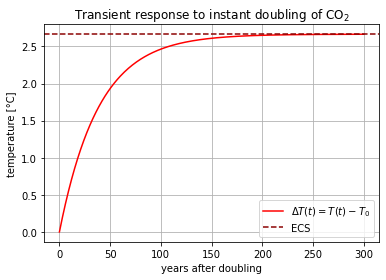

In [4]:
f, ax = plt.subplots(1)
EBM = ebm(14, 0, 1., double_CO2)
EBM.run(300)
ax.plot(EBM.t, EBM.T - EBM.T[0], label = "$\Delta T (t) = T(t) - T_0$", color = "red")

ax.axhline(ecs(EBM.B, EBM.a), label = "ECS", color = "darkred", ls = "--")

ax.legend()
ax.grid()
ax.set_title("Transient response to instant doubling of CO$_2$")
ax.set_ylabel("temperature [°C]")
ax.set_xlabel("years after doubling")

The plot above provides an example of an "abrupt 2xCO$_2$" experiment, a classic experimental treatment method in climate modelling which is used in practice to estimate ECS for a particular model (Note: in complicated climate models the values of the parameters $a$ and $B$ are not specified a priori, but emerge as outputs for the simulation).

The simulation begins at the preindustrial equilibrium, i.e. a temperature °C is in balance with the pre-industrial CO$_2$ concentration of 280 ppm until CO$_2$ is abruptly doubled from 280 ppm to 560 ppm. The climate responds by rapidly warming, and after a few hundred years approaches the equilibrium climate sensitivity value, by definition.

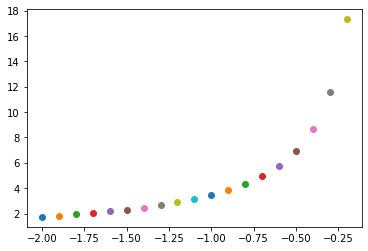

In [5]:
# Create a graph to visualize ECS as a function of B (B should be on the x axis)
# calculate the range from -2 to -0.1 with 0.1 as a step size
# Note use plt.scatter for plotting and 



Question:

(1) What does it mean for a climate system to have a more negative value of $B$? Explain why we call $B$ the climate feedback parameter.

Answer:

(2) What happens when $B$ is greater than or equal to zero?

Answer:

#### Exercise 1.2 - _Doubling CO₂_

To compute ECS, we doubled the CO₂ in our atmosphere. This factor 2 is not entirely arbitrary: without substantial effort to reduce CO₂ emissions, we are expected to **at least** double the CO₂ in our atmosphere by 2100. 

Right now, our CO₂ concentration is 415 ppm -- 1.482 times the pre-industrial value of 280 ppm from 1850. 

The CO₂ concentrations in the _future_ depend on human action. There are several models for future concentrations, which are formed by assuming different _policy scenarios_. A baseline model is RCP8.5 - a "worst-case" high-emissions scenario. In our notebook, this model is given as a function of ``t``.

In [6]:
def CO2_RCP85(t):
    return 280 * (1+ ((t-1850)/220)**3 * np.maximum(1., np.exp(((t-1850)-170)/100)))

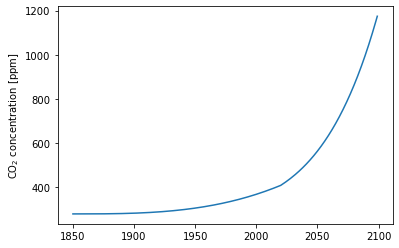

In [7]:
t = np.arange(1850, 2100)
plt.ylabel("CO$_2$ concentration [ppm]")
plt.plot(t, CO2_RCP85(t));

Question:

In what year are we expected to have doubled the CO₂ concentration, under policy scenario RCP8.5?

Hint: the function 
```python
np.where()
``` 
might be useful

In [8]:
# Enter your code here

Answer: 

#### Exercise 1.3 - _Uncertainty in B_

The climate feedback parameter ``B`` is not something that we can control– it is an emergent property of the global climate system. Unfortunately, ``B`` is also difficult to quantify empirically (the relevant processes are difficult or impossible to observe directly), so there remains uncertainty as to its exact value.

A value of ``B`` close to zero means that an increase in CO₂ concentrations will have a larger impact on global warming, and that more action is needed to stay below a maximum temperature. In answering such policy-related question, we need to take the uncertainty in ``B`` into account. In this exercise, we will do so using a Monte Carlo simulation: we generate a sample of values for ``B``, and use these values in our analysis.

Generate a probability distribution for for $B_{avg}$ above. Plot a histogram. 

Hint: use the functions

```python
np.random.normal() # with 50000 samples
```
and plot with 
```python
plt.hist()
```

In [9]:
sigma = 0.4
b_avg = -1.3

samples = # Enter code here


Text(0, 0.5, 'samples')

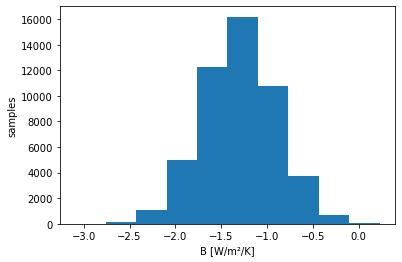

In [10]:
    # plot here
plt.xlabel("B [W/m²/K]")
plt.ylabel("samples")

Generate a probability distribution for the ECS based on the probability distribution function for $B$ above.

In [11]:
values =  # your code here

Text(0.5, 0, 'Temperature [°C]')

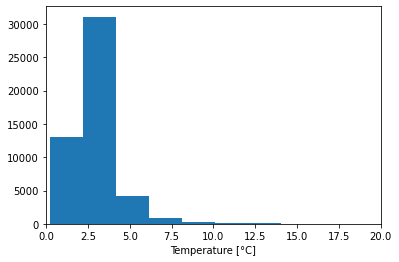

In [12]:
values = np.where((values < -20) | (values > 20) , np.nan, values) # drop outlier
plt.hist(values, bins = 20)
plt.xlim([0, 20])
plt.xlabel("Temperature [°C]")

It looks like the ECS distribution is **not normally distributed**, even though $B$ is. 

Question: How does $\overline{\text{ECS}(B)}$ compare to $\text{ECS}(\overline{B})$? What is the probability that $\text{ECS}(B)$ lies above $\text{ECS}(\overline{B})$?

In [13]:
# your code here

Question: Does accounting for uncertainty in feedbacks make our expectation of global warming better (less implied warming) or worse (more implied warming)?

Answer:

#### Exercise 1.5 - _Running the model_

In the lecture notebook we introduced a class `ebm` (_energy balance model_), which contains:
- the parameters of our climate simulation (`C`, `a`, `A`, `B`, `CO2_PI`, `alpha`, `S`, see details below)
- a function `CO2`, which maps a time `t` to the concentrations at that year. For example, we use the function `t -> 280` to simulate a model with concentrations fixed at 280 ppm.

`ebm` also contains the simulation results, in two arrays:
- `T` is the array of tempartures (°C, `Float64`).
- `t` is the array of timestamps (years, `Float64`), of the same size as `T`.


You can set up an instance of `ebm` like so:

In [14]:
def my_co2function(t):
    # here we imply NO co2 increase
    return 280

my_model = ebm(T=14, t=0, deltat=1., CO2=my_co2function)

In [15]:
my_model

Let's look into our ebm object

In [16]:
attrs = vars(my_model)
print(', \n'.join("%s: %s" % item for item in attrs.items()))

T: 14, 
t: 0, 
deltat: 1.0, 
C: 51.0, 
a: 5.0, 
B: -1.3, 
co2_pi: 280.0, 
alpha: 0.3, 
S: 1368.0, 
co2: <function my_co2function at 0x7f2fb16a2430>, 
CO2_PI: 280.0, 
A: 221.2


What function do we have?

In [17]:
help(my_model)

Help on ebm in module energy_balance_model object:

class ebm(builtins.object)
 |  ebm(T, t, deltat, CO2)
 |  
 |  Zero order energy balance model
 |  
 |  Methods defined here:
 |  
 |  __init__(self, T, t, deltat, CO2)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  absorbed_solar_radiation(self)
 |  
 |  greenhouse_effect(self)
 |  
 |  outgoing_thermal_radiation(self)
 |  
 |  run(self, end_year)
 |  
 |  tendency(self)
 |  
 |  timestep(self)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



In [18]:
# Run the model

EBM = ebm(14, 1850, 1, my_co2function)
EBM.run(10)

Again, look inside `simulated_model` and notice that `T` and `t` have accumulated the simulation results.

In this simulation, we used `T0 = 14` and `CO2 = 280`, which is why `T` is constant during our simulation. These parameters are the default, pre-industrial values, and our model is based on this equilibrium.

`Question`: Run a simulation starting at 1850 with policy scenario RCP8.5, and plot the computed temperature graph. What is the global temperature at 2100?

In [19]:
def CO2_RCP85(t):
    return 280 * (1+ ((t-1850)/220)**3 * np.maximum(1., np.exp(((t-1850)-170)/100)))

In [20]:
## Run the model here



We can change values before running the model.

In [21]:
EBM = ebm(15, 1850, 1, my_co2function)
EBM.B = -2
EBM.run(10)

In [22]:
EBM.T

array([15.        , 14.76862745, 14.54632834, 14.33274683, 14.12754107,
       13.9303826 , 13.74095583, 13.55895756, 13.38409648, 13.2160927 ,
       13.0546773 ])

#### Exercise 1.6 - _Application to policy relevant questions_ (BONUS)

We talked about two _emissions scenarios_: RCP2.6 (strong mitigation - controlled CO2 concentrations) and RCP8.5 (no mitigation - high CO2 concentrations). These are given by the following functions

In [23]:
def CO2_RCP26(t):
    return 280 * (1+ ((t-1850)/220)**3 * np.minimum(1., np.exp(-((t-1850)-170)/100)))
def CO2_RCP85(t):
    return 280 * (1+ ((t-1850)/220)**3 * np.maximum(1., np.exp(((t-1850)-170)/100)))

We are interested in how the **uncertainty in our input** $B$ (the climate feedback paramter) *propagates* through our model to determine the **uncertainty in our output** $T(t)$, for a given emissions scenario. The goal of this exercise is to answer the following by using *Monte Carlo Simulation* for *uncertainty propagation*:

> What is the probability that we see more than 2°C of warming by 2100 under the low-emissions scenario RCP2.6? What about under the high-emissions scenario RCP8.5?